# Proyek Analisis Data: Bike-sharing Dataset


## Menentukan Pertanyaan Bisnis

- Berapa banyak rata-rata sepeda yang disewa setiap hari?
- Pada jam berapa orang sering kali menyewa sepeda?
- Pada hari apa sepede banyak disewa? 

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
bike_hour_df = pd.read_csv('dataset/hour.csv')
bike_hour_df .head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum()) # memeriksa jumlah duplikasi

Jumlah duplikasi:  0


In [7]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
# mengubah kolom dteday yang sebelum bertipe object menjadi datetime
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])
# mengubah kolom hum yang sebelumnya bertipe float menjadi int
bike_hour_df["hum"] = bike_hour_df["hum"].astype("int64")

In [9]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  int64         
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [10]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.015536,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.123675,0.122340,49.305030,151.357286,181.387599


## Visualization & Explanatory Analysis

### Berapa banyak rata-rata sepeda yang disewa setiap hari?

In [11]:
average_rentals_per_day = bike_hour_df.groupby(bike_hour_df['dteday'].dt.date)['cnt'].mean()
print(f"Rata-rata sepeda yang disewa setiap hari: {average_rentals_per_day}")

Rata-rata sepeda yang disewa setiap hari: dteday
2011-01-01     41.041667
2011-01-02     34.826087
2011-01-03     61.318182
2011-01-04     67.913043
2011-01-05     69.565217
                 ...    
2012-12-27     88.083333
2012-12-28    128.958333
2012-12-29     55.875000
2012-12-30     74.833333
2012-12-31    113.708333
Name: cnt, Length: 731, dtype: float64


### Visualisasi: Berapa banyak rata-rata sepeda yang disewa setiap hari?

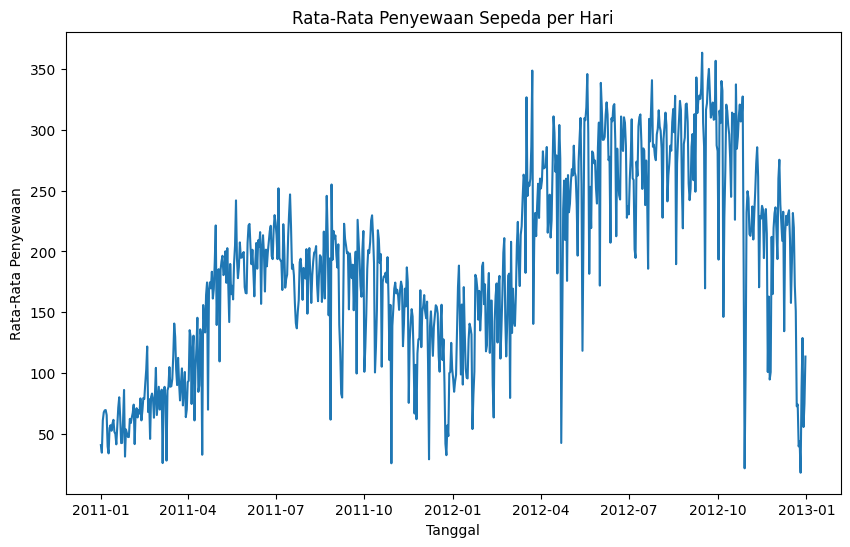

In [14]:
average_rentals_df = average_rentals_per_day.reset_index()
average_rentals_df.columns = ['date', 'average_rentals']

plt.figure(figsize=(10, 6))
plt.plot(average_rentals_df['date'], average_rentals_df['average_rentals'])
plt.title('Rata-Rata Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Penyewaan')
plt.show()

### Pada jam berapa orang sering kali menyewa sepeda?

In [13]:
popular_hour = bike_hour_df.groupby('hr')['cnt'].sum().idxmax()
print(f"Pada jam inilah orang sekali menyewa sepeda: {popular_hour}")


Pada jam inilah orang sekali menyewa sepeda: 17


### Visualisasi: Pada jam berapa orang sering kali menyewa sepeda?

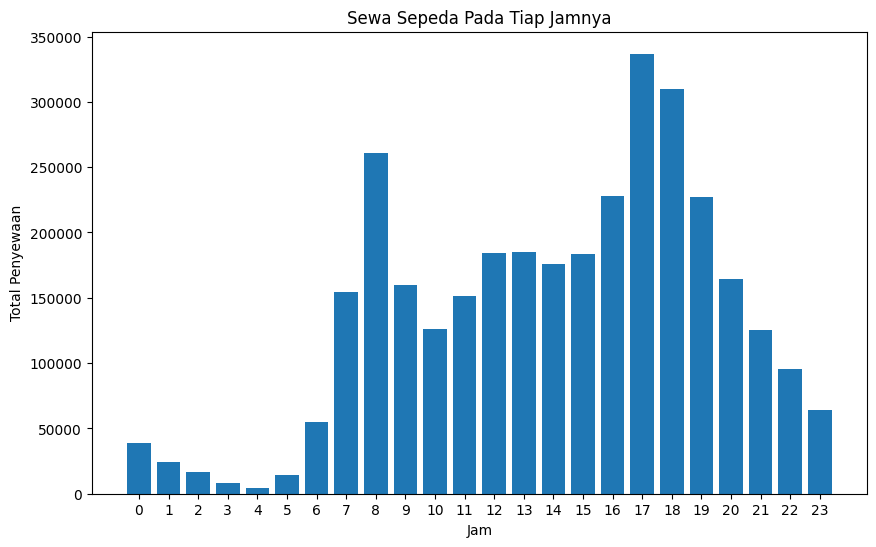

In [15]:
total_rentals_per_hour = bike_hour_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.bar(total_rentals_per_hour.index, total_rentals_per_hour.values)
plt.title('Sewa Sepeda Pada Tiap Jamnya')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(range(0, 24))
plt.show()

### Pada hari apa sepede banyak disewa?

In [12]:
total_rentals_per_day = bike_hour_df.groupby(bike_hour_df['dteday'].dt.dayofweek)['cnt'].sum().idxmax()
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
print(f"Hari dimana sepeda seringkali disewa adalah, hari {days[total_rentals_per_day]}")

Hari dimana sepeda seringkali disewa adalah, hari Jumat


### Visualisasi: Pada hari apa sepede banyak disewa?

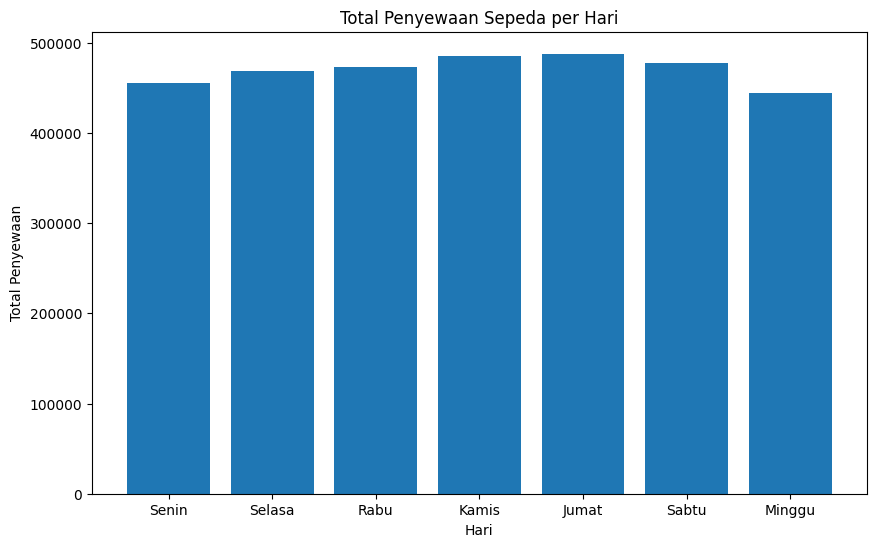

In [16]:
total_rentals_per_day = bike_hour_df.groupby(bike_hour_df['dteday'].dt.dayofweek)['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.bar(total_rentals_per_day.index, total_rentals_per_day.values, tick_label=days)
plt.title('Total Penyewaan Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')
plt.show()

## Conclusion

- Berapa banyak rata-rata sepeda yang disewa setiap hari? Metode yang digunakan adalah statistik deskriptif, khususnya perhitungan rata-rata. Mengelompokkan data berdasarkan hari, kemudian menghitung rata-rata jumlah sepeda yang disewa untuk setiap hari. Kesimpulannya dengan dataset yang diberikan, sewa sepeda seringkali naik dan turun

- Pada jam berapa orang sering kali menyewa sepeda? Metode yang digunakan adalah analisis frekuensi. Mengelompokkan data berdasarkan jam, kemudian menghitung frekuensi penyewaan sepeda untuk setiap jam. Jam dengan frekuensi penyewaan tertinggi adalah jam dimana orang paling sering menyewa sepeda. Berdasarkan data dan analisis yang telah dibuat, sepeda paling sering disewa pada pukul 17.00

- Pada hari apa sepeda banyak disewa? Metode yang digunakan juga adalah analisis frekuensi. Mengelompokkan data berdasarkan hari, kemudian menghitung frekuensi penyewaan sepeda untuk setiap harinya. Hari dengan frekuensi penyewaan tertinggi adalah hari dimana sepeda paling banyak disewa. Berdasarkan data dan analisis yang telah dibuat, sepeda paling sering disewa pada hari Jumat.